In [133]:
import json
import numpy as np
from collections import Counter
import re
from nltk import sent_tokenize

In [17]:
data = json.load(open('raw_data/all_train.json',encoding='utf-8'))


['Hotel Satisfaction',
 'Music Concert Attendance',
 'Company Bankruptcy Prediction',
 'Customer Churn Modelling',
 'Concrete Strength Classification',
 'Car Acceptability Valuation',
 'Student Job Placement',
 'Used Cars Price-Range Prediction',
 'Student Job Placement',
 'Concrete Strength Classification',
 'Student Job Placement',
 'Tic-Tac-Toe Strategy',
 'House Price Classification',
 'Advertisement Prediction',
 'Music Concert Attendance',
 'Mobile Price-Range Classification',
 'Cab Surge Pricing System',
 'Advertisement Prediction',
 'Flight Price-Range Classification',
 'Water Quality Classification',
 'Employee Attrition',
 'Company Bankruptcy Prediction',
 'House Price Classification',
 'E-Commerce Shipping',
 'Printer Sales',
 'Hotel Satisfaction',
 'Vehicle Insurance Claims',
 'Real Estate Investment',
 'Vehicle Insurance Claims',
 'Insurance Churn',
 'Student Job Placement',
 'Vehicle Insurance Claims',
 'Insurance Churn',
 'Credit Card Fraud Classification',
 'Tic-Tac-Toe

In [76]:
data[0].keys()

dict_keys(['model_name', 'deleted', 'mturk_id', 'predicted_class', 'narrative_status', 'predicted_class_label', 'date_submitted', 'id', 'feature_division', 'date_approved', 'test_instance', 'features_placeholder', 'is_paid', 'task_name', 'prediction_confidence', 'redeem_code', 'narrator', 'narration', 'user_ip', 'narrative_question', 'prediction_confidence_level'])

In [19]:
[i.get('task_name', None) for i in data]

530

In [99]:
from collections import Counter
count = Counter([i.get('task_name', None) for i in data])
(count.values())

dict_values([9, 4, 11, 9, 12, 6, 12, 15, 11, 12, 14, 14, 15, 22, 6, 14, 9, 15, 11, 8, 7, 8, 13, 13, 12, 9, 12, 11, 10, 5, 7, 11, 12, 10, 8, 13, 8, 11, 7, 5, 109])

In [95]:
count = Counter([i.get('model_name', None) for i in data])
(count.most_common())
count.values()

dict_values([85, 72, 4, 10, 21, 34, 4, 37, 6, 50, 20, 3, 13, 33, 6, 11, 1, 5, 4, 2, 109])

In [101]:
no_task = [x for x in data if x.get('narrative_question', None) == None]

In [105]:
len(no_task)

109

In [31]:
json.dump(no_task, open('no_task.json', 'w', encoding='utf-8'), ensure_ascii=False)

In [59]:
set([', '.join(sorted(list(task.keys()))) for task in data])

{'date_approved, date_submitted, deleted, feature_division, features_placeholder, id, is_paid, model_name, mturk_id, narration, narrative_question, narrative_status, narrator, predicted_class, predicted_class_label, prediction_confidence, prediction_confidence_level, redeem_code, task_name, test_instance, user_ip',
 'date_approved, date_submitted, deleted, feature_division, features_placeholder, id, is_paid, model_name, mturk_id, narration, narrative_question, narrative_status, narrator, predicted_class, predicted_class_label, prediction_confidence_level, redeem_code, task_name, test_instance, user_ip',
 'feature_division, narration, narration3, predicted_class, prediction_confidence_level',
 'feature_division, narration, predicted_class, prediction_confidence_level'}

There is only one instance of narration3. I think this must have been an instance where there was 2 narrations for one thing

In [106]:
Counter([', '.join(sorted(list(task.keys()))) for task in no_task]).most_common()

[('feature_division, narration, predicted_class, prediction_confidence_level',
  108),
 ('feature_division, narration, narration3, predicted_class, prediction_confidence_level',
  1)]

In [43]:
min([(len(d['prediction_confidence_level'].split(','))) for d in no_task])

3

In [44]:
task = [x for x in data if x.get('task_name', None) != None]

In [46]:
max([(len(d['prediction_confidence_level'].split(','))) for d in task])

4

In [107]:
no_task[0]

{'predicted_class': 'C3',
 'prediction_confidence_level': 'C1:40.36%, C2:10.15%, C3:49.49%',
 'feature_division': {'ranks': [['F14', 0],
   ['F8', 1],
   ['F15', 2],
   ['F28', 3],
   ['F2', 4],
   ['F36', 5],
   ['F30', 6],
   ['F9', 7],
   ['F26', 8],
   ['F3', 9],
   ['F18', 10],
   ['F13', 11],
   ['F35', 12],
   ['F33', 13],
   ['F32', 14],
   ['F34', 15],
   ['F38', 16],
   ['F42', 17],
   ['F23', 18],
   ['F43', 19],
   ['F12', 20],
   ['F31', 21],
   ['F4', 22],
   ['F24', 23],
   ['F5', 24],
   ['F39', 25],
   ['F21', 26],
   ['F22', 27],
   ['F37', 28],
   ['F20', 29],
   ['F16', 30],
   ['F25', 31],
   ['F40', 32],
   ['F11', 33],
   ['F10', 34],
   ['F41', 35],
   ['F17', 36],
   ['F29', 37],
   ['F6', 38],
   ['F1', 39],
   ['F7', 40],
   ['F19', 41],
   ['F27', 42]],
  'contradict': ['F8',
   'F28',
   'F2',
   'F36',
   'F30',
   'F3',
   'F18',
   'F13',
   'F32',
   'F34',
   'F38',
   'F43',
   'F12',
   'F31',
   'F4',
   'F24',
   'F22',
   'F16',
   'F25'],
  'supp

In [121]:
test = json.load(open('raw_data/test_set_new.json',encoding='utf-8'))
len(test)

48

In [67]:
Counter([', '.join(sorted(list(task.keys()))) for task in test]).most_common()

[('date_approved, date_submitted, deleted, feature_division, features_placeholder, id, is_paid, model_name, mturk_id, narration, narrative_question, narrative_status, narrator, predicted_class, predicted_class_label, prediction_confidence, prediction_confidence_level, redeem_code, task_name, test_instance, user_ip',
  24),
 ('date_approved, date_submitted, deleted, feature_division, features_placeholder, id, is_paid, model_name, mturk_id, narration, narrative_question, narrative_status, narrator, predicted_class, predicted_class_label, prediction_confidence_level, redeem_code, task_name, test_instance, user_ip',
  24)]

In [73]:
count = Counter([i.get('task_name', None) for i in test])
len(count.most_common())

31

In [108]:
all = json.load(open('raw_data/all.json',encoding='utf-8'))

In [123]:
test = [x['model_name']+x['task_name'] for x in all if x.get('test_instance', None) != None]
train = [x['model_name']+x['task_name'] for x in all if x.get('test_instance', None) == None]

In [118]:
Counter(test).most_common()

[('LogisticRegressionUsed Cars Price-Range Prediction', 9),
 ('LogisticRegressionFlight Price-Range Classification', 9),
 ('BernoulliNBPersonal Loan Modelling', 8),
 ('SGDClassifierHouse Price Classification', 8),
 ('RandomForestClassifierFlight Price-Range Classification', 7),
 ('RandomForestClassifierCompany Bankruptcy Prediction', 6),
 ('RandomForestClassifierStudent Job Placement', 6),
 ('SVM_polyMobile Price-Range Classification', 6),
 ('DecisionTreeClassifierInsurance Churn', 6),
 ('GradientBoostingClassifierBasketball Players Career Length Prediction', 6),
 ('SVMClassifier_polyEmployee Attrition', 6),
 ('SVM_linearEmployee Promotion Prediction', 6),
 ('KNeighborsClassifierCredit Risk Classification', 6),
 ('RandomForestClassifierMobile Price-Range Classification', 6),
 ('LogisticRegressionAirline Passenger Satisfaction', 6),
 ('GradientBoostingClassifierParis House Classification', 6),
 ('KNeighborsClassifierCab Surge Pricing System', 6),
 ('RandomForestClassifierPrinter Sales',

In [120]:
len(test)

469

## Number of Features

In [8]:
from datasets import load_dataset
import matplotlib.pyplot as plt

In [268]:
train = load_dataset("james-burton/textual-explanations", split='train')
test = load_dataset("james-burton/textual-explanations", split='test')
val = load_dataset("james-burton/textual-explanations", split='validation')

Using custom data configuration james-burton--textual-explanations-19ff8605823ae74a
Found cached dataset parquet (/home/james/.cache/huggingface/datasets/james-burton___parquet/james-burton--textual-explanations-19ff8605823ae74a/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Using custom data configuration james-burton--textual-explanations-19ff8605823ae74a
Found cached dataset parquet (/home/james/.cache/huggingface/datasets/james-burton___parquet/james-burton--textual-explanations-19ff8605823ae74a/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Using custom data configuration james-burton--textual-explanations-19ff8605823ae74a
Found cached dataset parquet (/home/james/.cache/huggingface/datasets/james-burton___parquet/james-burton--textual-explanations-19ff8605823ae74a/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


[]

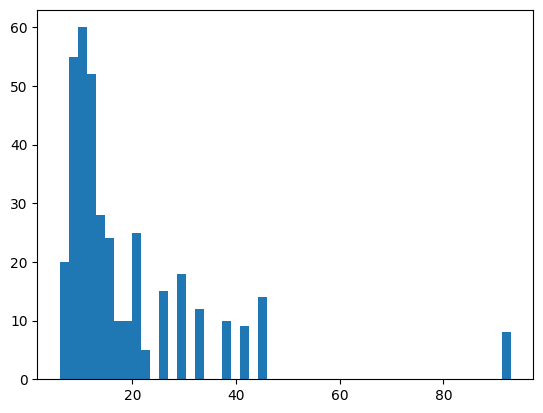

In [11]:
plt.hist([len(fs) for fs in  train['feature_nums']], bins=50)
plt.plot()

## Saving test narrations

In [18]:
with open('../jb_data/narrations_only_test.txt', 'w') as f:
    for item in test['narration']:
        f.writelines(item + '\n')
                


## Dataset information

Statistics for the train set (length 375)

The first question is either:
* Summarise the prediction (336 times)
* Summarise the ranking of the features (39 times)

The second question is either:
* Give an overview of the top features (250 times)
* Give direction of influence of the following features (86 times)
* Summarise the ranking of the features (39 times) ACCOUNTED FOR

The third question is either:
* Compare and contrast the following features (355 times)
* 'For these top features, what are the respective directions of influence on the prediction?'(20 times)

198 have 4 or more questions
* Describe the direction of the following features (121 times)
* Summarise the unimportant features (73 times)
* 'Describe the degree of impact of the following features: [blank]?' (4 times)

39 have 5 or more questions
* 'Provide a statement on the features with the least impact on the prediction made for this test case.' (39 times) ACCOUNTED FOR



```python
reg = re.compile(r'F\d+')
Counter([l['narrative_questions'][1] for l in train if l['narrative_questions'][0] == 'Provide a statement summarizing the prediction made for the test case.']).most_common()
[[' '.join(reg.findall(n)) for n in l['narrative_questions']] for l in train if l['narrative_questions'][0] == 'Provide a statement summarizing the prediction made for the test case.']
[' '.join(l['feature_nums']) for l in train if l['narrative_questions'][0] == 'Provide a statement summarizing the prediction made for the test case.']
```
A. For 99 cases the format is:
* 'In a single sentence, state the prediction output of the model for the selected test case along with the confidence level of the prediction (if applicable).'
* "In no less three sentences, provide a brief overview of the features with a higher impact on the model's output prediction."
* 'Describe the degree of impact of the following features: [0-4 fts (after first 7-9)]?' (3 times there are 0)

B. For 78 cases the format is:
* "For this test instance, provide information on the predicted label along with the confidence level of the model's decision." -->
* "Summarize the top features influencing the model's decision along with the respective directions of influence on the prediction?"
* 'Summarize the direction of influence of the features [the next 3-4 features (after first 2-4)] with moderate impact on the prediction made for this test case.'

C. For 53 cases the format is:
* 'Summarize the prediction for the given test example?'
* "In two sentences, provide a brief overview of the features with a higher impact on the model's output prediction."
* 'Compare and contrast the impact of the following attributes  [3-4 seemingly random features] on the model’s prediction of [C1/C2].'
* 'Summarize the set of features has little to no impact on the prediction?'

D. For 20 cases the format is:
* 'Summarize the prediction for the given test example?'
* 'For this test case, summarize the top features influencing the model's decision.'
* 'For these top features, what are the respective directions of influence on the prediction?'
* 'Provide a statement on the set of features has limited impact on the prediction of [C1/C2] by the model for the given test example?'

E. For 39 cases the format is:
* 'Summarize the prediction made for the test under consideration along with the likelihood of the different possible class labels.'
* 'Provide a statement summarizing the ranking of the features as shown in the feature impact plot.'
* 'Compare the direction of impact of the features: [2-5 top features].'
* 'Summarize the direction of influence of the features [the next 3-4 features] with moderate impact on the prediction made for this test case.'
* 'Provide a statement on the features with the least impact on the prediction made for this test case.'

F. For 44 cases the format is:
* 'Provide a statement summarizing the prediction made for the test case.'
* 'For the current test instance, describe the direction of influence of the following features: [2-5 top features]'
* 'Compare and contrast the impact of the following features [the next 3-4 features] on the model’s prediction of [C1/C2].'
* 'Describe the degree of impact of the following features: [the next 0-4 features]?' (usually 4 unless there are not enough features)

G. For 39 cases the format is:
* 'Provide a statement summarizing the ranking of the features as shown in the feature impact plot.'
* 'Summarize the direction of influence of the features [2-5 top features] on the prediction made for this test case.'
* 'Compare the direction of impact of the features: [the next 3-4 features].'
* 'Describe the degree of impact of the following features:[the next 0-4 features]'

H. For 3 cases the format is:
* 'Summarize the prediction made for the test under consideration along with the likelihood of the different possible class labels.'
* 'Summarize the direction of influence of the variables [2-3 top features] on the prediction made for this test case.' -->
* 'Compare the direction of impact of the variables: [the next 3-4 features].'
* 'Describe the degree of impact of the following variables: [the next 3-4 features]?'

| Q | A | New Q |
| ---- | ---- | ---- |
| Summarise the prediction | Note: In E (39) this question is asked across 2 sentences | Summarise the prediction |
| Summarise the top features | A-D (250): Top features aren't named, just says 'top features' | a) Summarise the top features |
|   | E-H  (125) specifies 2-5 top features | b) Summarise these top features ([fts]) |
|   | Note: In D (20) this question is asked across 2 sentences |   |
| Summarise moderate fts | A (99): 3-4 named fts (after first 7-9) | Summarise these moderate features ([fts]) |
|   | B, C (131): 3-4 named fts (after first 2-4) |   |
|   | E-H (125) named fts (the next 3-4) |   |
|   | Note: D (20) does not have this Q
| Summarise more/lower fts | C-E (112) describe fts with little to no impact (fts not named) | a) Summarise the negligible features |
|   | F-H (86) 0-4 named fts | b) Summarise these negligible features ([fts]) |
|   | Note: A,B (177) do not have a 4th Q |   |


In [245]:
Counter([l['narrative_questions'][0] for l in train ]).most_common()

[('In a single sentence, state the prediction output of the model for the selected test case along with the confidence level of the prediction (if applicable).',
  99),
 ("For this test instance, provide information on the predicted label along with the confidence level of the model's decision.",
  78),
 ('Summarize the prediction for the given test example?', 73),
 ('Provide a statement summarizing the prediction made for the test case.',
  44),
 ('Summarize the prediction made for the test under consideration along with the likelihood of the different possible class labels.',
  42),
 ('Provide a statement summarizing the ranking of the features as shown in the feature impact plot.',
  39)]

In [263]:
[[' '.join(reg.findall(n)) for n in l['narrative_questions']] for l in train if all((l['narrative_questions'][1] == "In two sentences, provide a brief overview of the features with a higher impact on the model's output prediction.", 1==1))]


[['', '', 'F5 F18 F1', ''],
 ['', '', 'F10 F12 F2 F21', ''],
 ['', '', 'F3 F10 F2 F6', ''],
 ['', '', 'F11 F2 F10 F15', ''],
 ['', '', 'F31 F15 F7', ''],
 ['', '', 'F4 F13 F16 F14', ''],
 ['', '', 'F3 F14 F11 F8', ''],
 ['', '', 'F2 F4 F5', ''],
 ['', '', 'F3 F13 F15', ''],
 ['', '', 'F12 F11 F19', ''],
 ['', '', 'F9 F59 F63', ''],
 ['', '', 'F13 F7 F18 F21', ''],
 ['', '', 'F24 F14 F30 F18', ''],
 ['', '', 'F4 F7 F5 F2', ''],
 ['', '', 'F4 F1 F14', ''],
 ['', '', 'F17 F26 F15', ''],
 ['', '', 'F8 F7 F1 F4', ''],
 ['', '', 'F11 F9 F4', ''],
 ['', '', 'F7 F2 F8', ''],
 ['', '', 'F15 F5 F4', ''],
 ['', '', 'F2 F10 F1 F4', ''],
 ['', '', 'F18 F12 F30 F10', ''],
 ['', '', 'F8 F7 F9 F1', ''],
 ['', '', 'F4 F10 F5 F9', ''],
 ['', '', 'F7 F6 F8', ''],
 ['', '', 'F4 F9 F7', ''],
 ['', '', 'F19 F22 F4', ''],
 ['', '', 'F8 F6 F4 F3', ''],
 ['', '', 'F9 F3 F2 F10', ''],
 ['', '', 'F2 F4 F6', ''],
 ['', '', 'F5 F6 F7', ''],
 ['', '', 'F8 F5 F7 F1', ''],
 ['', '', 'F9 F8 F16 F15', ''],
 ['', '', 'F

In [262]:
[' '.join(l['feature_nums']) for l in train if all((l['narrative_questions'][1] == , 1==1))]

['F3 F20 F10 F5 F18 F1 F17 F4 F15 F14 F19 F9 F16 F12 F6 F2 F7 F11 F8 F13',
 'F22 F12 F23 F9 F5 F26 F21 F3 F1 F13 F15 F25 F8 F10 F17 F20 F14 F24 F6 F7 F11 F18 F16 F19 F2 F4',
 'F11 F7 F3 F10 F2 F6 F9 F1 F8 F12 F4 F5',
 'F8 F14 F11 F2 F10 F15 F6 F16 F3 F12 F7 F4 F1 F13 F9 F5 F17',
 'F11 F46 F8 F36 F31 F15 F7 F29 F10 F35 F16 F38 F39 F6 F24 F30 F1 F26 F44 F14 F17 F9 F13 F19 F45 F18 F12 F42 F5 F34 F2 F37 F28 F23 F20 F4 F25 F32 F40 F22 F21 F27 F43 F33 F3 F41',
 'F8 F2 F4 F13 F16 F14 F7 F3 F11 F12 F10 F5 F17 F1 F9 F6 F15',
 'F2 F4 F3 F14 F11 F8 F17 F7 F10 F6 F16 F19 F18 F1 F15 F5 F9 F13 F12',
 'F7 F9 F1 F2 F4 F5 F8 F3 F6',
 'F12 F6 F8 F3 F13 F15 F5 F1 F10 F2 F9 F14 F7 F11 F4',
 'F26 F6 F16 F18 F4 F12 F11 F19 F22 F25 F23 F24 F2 F3 F13 F21 F17 F7 F20 F1 F5 F8 F9 F10 F14 F15',
 'F51 F26 F4 F55 F9 F59 F63 F6 F32 F28 F89 F50 F10 F43 F57 F65 F54 F19 F8 F42 F67 F45 F11 F71 F39 F87 F56 F73 F17 F22 F16 F23 F80 F60 F62 F88 F38 F91 F36 F52 F47 F5 F46 F49 F81 F68 F90 F2 F40 F1 F77 F93 F76 F75 F24 F21 F74

In [293]:
Counter([l['narrative_questions'][4] for l in train if all((l['narrative_questions'][0] == 'Summarize the prediction made for the test under consideration along with the likelihood of the different possible class labels.', l['narrative_questions'][1]=='Provide a statement summarizing the ranking of the features as shown in the feature impact plot.'))]).most_common()
# Counter([len(l['narrative_questions']) for l in train if l['narrative_questions'][0] == 'In a single sentence, state the prediction output of the model for the selected test case along with the confidence level of the prediction (if applicable).']).most_common()

[('Provide a statement on the features with the least impact on the prediction made for this test case.',
  39)]

In [181]:
# [' '.join([num+' ' +ft for num, ft in zip(l['values'], l['feature_nums'])]) for l in train if l['narrative_questions'][0] == 'In a single sentence, state the prediction output of the model for the selected test case along with the confidence level of the prediction (if applicable).']

['0.42 F2 -0.24 F4 -0.11 F6 -0.09 F1 -0.05 F3 -0.04 F5',
 '0.08 F16 0.06 F19 -0.00 F1 0.00 F12 0.00 F17 -0.00 F6 0.00 F8 0.00 F7 -0.00 F4 0.00 F15 -0.00 F9 0.00 F11 0.00 F5 0.00 F18 0.00 F14 0.00 F3 0.00 F13 -0.00 F10 0.00 F2',
 '0.10 F24 0.07 F14 0.06 F16 0.06 F1 0.03 F21 0.03 F13 -0.02 F26 0.02 F25 0.02 F5 -0.02 F11 -0.02 F22 0.02 F18 0.02 F2 0.01 F10 -0.01 F20 -0.01 F6 -0.01 F19 0.01 F17 0.01 F8 0.01 F15 0.00 F3 0.00 F9 0.00 F7 0.00 F4 0.00 F12 0.00 F23',
 '0.78 F19 0.14 F12 0.11 F17 -0.04 F4 -0.03 F15 0.03 F14 0.03 F8 0.02 F18 -0.02 F5 -0.02 F11 0.02 F2 -0.02 F3 -0.01 F6 -0.01 F7 0.01 F13 0.01 F20 -0.01 F1 -0.01 F9 -0.00 F16 -0.00 F10',
 '0.53 F10 0.32 F2 0.18 F5 0.15 F8 0.13 F6 0.05 F1 -0.04 F3 -0.03 F9 -0.00 F4 0.00 F7',
 '-0.38 F6 0.26 F7 0.26 F3 0.22 F1 -0.22 F9 -0.16 F4 -0.16 F2 0.16 F5 -0.01 F8',
 '0.47 F5 0.22 F7 0.20 F3 0.19 F2 0.05 F6 0.01 F4 0.01 F1',
 '0.47 F2 0.23 F8 0.20 F4 0.08 F9 -0.07 F7 0.05 F3 0.05 F6 -0.02 F5 -0.01 F1',
 '0.12 F1 -0.12 F3 -0.09 F2 0.09 F6 -0.08 F

In [170]:
train

Dataset({
    features: ['model_name', 'predicted_class', 'task_name', 'narration', 'values', 'sign', 'narrative_id', 'unique_id', 'classes_dict', 'narrative_questions', 'feature_nums', 'ft_num_to_name', 'old2new_ft_nums', 'old2new_classes'],
    num_rows: 375
})

In [97]:
[l['narration'].split(". ")[0] for l in train if l['narrative_questions'][0] == 'Provide a statement summarizing the ranking of the features as shown in the feature impact plot.']

['Analysis performed to understand the contribution of each input feature revealed that: F7, F9, and F3 are the most influential features when assigning a label to the given case',
 'Apart from F1 and F9, all the other variables mentioned above have a strong positive influence, improving the odds of the prediction class, C2',
 'F6, F8, F3, F4, and F5 have a moderate degree of impact while on the contrary F7 and F1 have little impact',
 'Based on the values of these variables, the likelihood of the C2 label is 65.51 percent',
 'This means, there is a 32.46% chance that C1 could be the label and the classification assertion above is influenced mainly by the variables F11, F4, F7, and F9',
 'Specifically, there is about an 80.0% chance that C2 is the correct label',
 'Therefore, the most probable class for the given case is C2',
 'F12, F1, F17, and F28 are the four features with the most impact',
 'Therefore, the most likely label is identified as C2 and the attribution analysis shows tha

## Investigating answers to the questions

### Q1: Summarise the ranking of the features
What does this mean?


In [98]:
[l['narration'].split(". ")[0] for l in train if l['narrative_questions'][0] == 'Provide a statement summarizing the ranking of the features as shown in the feature impact plot.']

['The classifier is 69.02% certain that the given case is under the class label C1, implying that the likelihood of C2 is only 30.98%',
 "According to the machine learning model, it is more likely that the case's label is C2, with a certainty of 100.0%, and this prediction decision is mainly based on the effects of the following features: F8, F10, F6, F9, and F1 on the model",
 'The given case is likely C2 with a confidence level of 87.50% judged based on the values of the input features supplied to the classifier and according to the attributions analysis, F9 and F2 have a high degree of impact',
 'The model has classified the instance as C2 due to the effects of the following features: F5, F8, F6, and F2',
 'The likelihood of C2 being the correct label for the selected case or instance is 67.54% according to the classifier',
 'The confidence level score with respect to each class label suggests that this case should be labelled as C2',
 'The prediction probability of C1 is 17.93% and


Answers to this question are almost always still the same as what we would have got for the other question: A statement on the prediction of the model.

### Q2: Summarise the ranking of the features

Is this the same as when asked in Q1?

In [100]:
[l['narration'].split(". ")[1] for l in train if l['narrative_questions'][1] == 'Provide a statement summarizing the ranking of the features as shown in the feature impact plot.']

[" Regarding the classifier's decision, there is close to an even split on the probability of either of the possible labels is the correct label but the classifier chooses the label as C2",
 'F6 and F10 are deemed the most important features whereas on the other hand all the other features have moderate to minimal amounts of influence',
 'The most relevant features that led to the C1 classification verdict are F5, F30, F26, F17, and F15',
 "According to the attribution analysis conducted, the different input variables have varying degrees of influence on the model's decision here",
 'F12 and F1 are the most important variables with respect to this classification verdict while all other variables are shown to have a medium or low impact',
 'F24 had the largest impact, followed by F23, F9, F18, F14, F10, F11, F2, F8, F21, F20, F27, F4, F12, F15, F19, F13, F16, F30, and finally, F29, which had the smallest non-zero impact',
 'F11 is by far the most influential feature whereas F4, F6, and 

Seems to just be a 2 sentence question asking the same thing as the single sentence

### Q3: 'For these top features, what are the respective directions of influence on the prediction?' Are these top features named?

For these 20 instances,
* 'Summarize the prediction for the given test example?'
* 'For this test case, summarize the top features influencing the model's decision.'
* 'For these top features, what are the respective directions of influence on the prediction?'
* 'Provide a statement on the set of features has limited impact on the prediction of [C1/C2] by the model for the given test example?'


In [145]:
reg = re.compile(r'F\d+')
[[reg.findall(n) for n in l['narrative_questions']] for l in train if l['narrative_questions'][2] == 'For these top features, what are the respective directions of influence on the prediction?']
Counter([len(l['narrative_questions']) for l in train if l['narrative_questions'][2] == 'For these top features, what are the respective directions of influence on the prediction?']).most_common()

[(4, 20)]

### Let's try to separate the narrative answers into the questions that they ask
Can do this, at least initially, by finding noting whether the sentence has F# in

In [127]:
reg = re.compile(r'F\d+')
[[bool(reg.search(n)) for n in sent_tokenize(l['narration'])] for l in train if l['narrative_questions'][1] == 'Provide a statement summarizing the ranking of the features as shown in the feature impact plot.']
[[reg.search(n) for n in sent_tokenize(l['narration'])] for l in train if l['narrative_questions'][1] == 'Provide a statement summarizing the ranking of the features as shown in the feature impact plot.']
# Store all matches as a list of strings
[[reg.findall(n) for n in sent_tokenize(l['narration'])] for l in train if l['narrative_questions'][1] == 'Provide a statement summarizing the ranking of the features as shown in the feature impact plot.']

[[[],
  [],
  ['F4', 'F11', 'F3', 'F15', 'F7', 'F19', 'F1'],
  [],
  ['F3', 'F15', 'F8', 'F20'],
  ['F4', 'F11', 'F12', 'F2'],
  ['F4', 'F11']],
 [[],
  ['F6', 'F10'],
  ['F6', 'F10'],
  ['F4', 'F1', 'F9', 'F12', 'F8'],
  ['F3', 'F8', 'F2']],
 [[],
  ['F5', 'F30', 'F26', 'F17', 'F15'],
  ['F3', 'F4', 'F13', 'F27'],
  [],
  ['F5', 'F30', 'F26', 'F17', 'F15'],
  []],
 [[],
  [],
  ['F18',
   'F31',
   'F19',
   'F36',
   'F35',
   'F20',
   'F38',
   'F37',
   'F3',
   'F25',
   'F16',
   'F33',
   'F6'],
  [],
  ['F18', 'F31', 'F19', 'F36', 'F38', 'F18', 'F31'],
  ['F19', 'F36', 'F38'],
  ['F35', 'F20', 'F5'],
  ['F18', 'F31', 'F9', 'F23', 'F19', 'F36', 'F5', 'F35', 'F20', 'F38']],
 [[],
  ['F12', 'F1'],
  ['F12', 'F1'],
  ['F4', 'F11', 'F3', 'F8', 'F2'],
  ['F7', 'F8', 'F6']],
 [[],
  ['F24',
   'F23',
   'F9',
   'F18',
   'F14',
   'F10',
   'F11',
   'F2',
   'F8',
   'F21',
   'F20',
   'F27',
   'F4',
   'F12',
   'F15',
   'F19',
   'F13',
   'F16',
   'F30',
   'F29'],
  ['F24',

In [132]:
# Store all matches as a list of strings
[[reg.findall(n) for n in l['narrative_questions']] for l in train if l['narrative_questions'][1] == 'Provide a statement summarizing the ranking of the features as shown in the feature impact plot.']

[[[], [], ['F4', 'F11'], ['F3', 'F15', 'F8', 'F12'], []],
 [[], [], ['F6', 'F10'], ['F4', 'F1', 'F9', 'F11'], []],
 [[], [], ['F5', 'F30'], ['F26', 'F17', 'F15', 'F28'], []],
 [[], [], ['F18', 'F31', 'F19', 'F36', 'F38'], ['F35', 'F20', 'F5'], []],
 [[], [], ['F12', 'F1'], ['F11', 'F4', 'F3', 'F5'], []],
 [[], [], ['F24', 'F23', 'F9', 'F18', 'F14'], ['F10', 'F11', 'F2'], []],
 [[], [], ['F11', 'F4', 'F6', 'F17', 'F3'], ['F5', 'F2', 'F16'], []],
 [[], [], ['F18', 'F3', 'F12'], ['F15', 'F14', 'F4'], []],
 [[], [], ['F36', 'F8', 'F26', 'F35', 'F3'], ['F12', 'F24', 'F9'], []],
 [[], [], ['F17', 'F9'], ['F19', 'F18', 'F43', 'F23'], []],
 [[], [], ['F4', 'F8'], ['F3', 'F14', 'F5', 'F7'], []],
 [[], [], ['F8', 'F6', 'F17'], ['F4', 'F10', 'F5'], []],
 [[], [], ['F4', 'F10', 'F1', 'F2', 'F7'], ['F9', 'F8', 'F6'], []],
 [[], [], ['F8', 'F21', 'F27', 'F24', 'F14'], ['F25', 'F28', 'F17'], []],
 [[], [], ['F33', 'F8', 'F17', 'F37', 'F4'], ['F29', 'F32', 'F2'], []],
 [[], [], ['F1', 'F4', 'F2'], ['F

In [129]:
[l['narration'].split(". ")[:2] for l in train if l['narrative_questions'][1] == 'Provide a statement summarizing the ranking of the features as shown in the feature impact plot.']

[['The classifier is very uncertain about the correct label for the case given',
  " Regarding the classifier's decision, there is close to an even split on the probability of either of the possible labels is the correct label but the classifier chooses the label as C2"],
 ['The model is confident in its prediction, as it predicted class C1 with a likelihood of 90.48% and hence, for the given case, there is a smaller chance of it being any other class label',
  'F6 and F10 are deemed the most important features whereas on the other hand all the other features have moderate to minimal amounts of influence'],
 ['The most likely label for the given case is C1 since the predicted probability of C2 is only 34.27% and this means that the likelihood of C1 is 65.73%',
  'The most relevant features that led to the C1 classification verdict are F5, F30, F26, F17, and F15'],
 ['The prediction likelihoods across the two classes are 15.35% for class C1 and 84.65% for C2, it can be concluded that C2

In [130]:
Counter([l[4] for l in train['narrative_questions'] if l[1] == 'Provide a statement summarizing the ranking of the features as shown in the feature impact plot.']).most_common()

[('Provide a statement on the features with the least impact on the prediction made for this test case.',
  39)]

In [131]:
[' '.join(l['feature_nums']) for l in train if l['narrative_questions'][1] == 'Provide a statement summarizing the ranking of the features as shown in the feature impact plot.']

['F4 F11 F3 F15 F8 F12 F2 F20 F10 F9 F14 F16 F18 F6 F5 F17 F13 F7 F19 F1',
 'F6 F10 F4 F1 F9 F11 F5 F12 F7 F3 F8 F2',
 'F5 F30 F26 F17 F15 F28 F14 F1 F23 F9 F2 F20 F19 F29 F21 F18 F22 F6 F12 F10 F3 F4 F13 F27 F16 F7 F24 F11 F25 F8',
 'F18 F31 F19 F36 F38 F35 F20 F5 F9 F23 F22 F17 F7 F28 F8 F21 F24 F10 F1 F32 F30 F15 F26 F2 F13 F34 F27 F4 F11 F14 F29 F12 F37 F3 F25 F16 F33 F6',
 'F12 F1 F11 F4 F3 F5 F10 F2 F9 F7 F8 F6',
 'F24 F23 F9 F18 F14 F10 F11 F2 F8 F21 F20 F27 F4 F12 F15 F19 F13 F16 F30 F29 F22 F6 F1 F5 F26 F3 F25 F7 F17 F28',
 'F11 F4 F6 F17 F3 F5 F2 F16 F9 F14 F12 F1 F7 F18 F15 F8 F13 F19 F10',
 'F18 F3 F12 F15 F14 F4 F17 F11 F13 F2 F7 F20 F6 F10 F16 F5 F1 F8 F19 F9',
 'F36 F8 F26 F35 F3 F12 F24 F9 F21 F6 F20 F5 F4 F25 F19 F27 F7 F23 F37 F31 F30 F33 F13 F28 F11 F10 F22 F2 F29 F15 F1 F38 F14 F32 F16 F34 F17 F18',
 'F17 F9 F19 F18 F43 F23 F32 F20 F33 F29 F24 F46 F42 F5 F26 F13 F15 F34 F30 F1 F14 F7 F31 F38 F12 F11 F37 F28 F10 F27 F21 F40 F6 F25 F2 F4 F44 F36 F39 F41 F16 F8 F3 F22 

In [111]:
train

Dataset({
    features: ['model_name', 'predicted_class', 'task_name', 'narration', 'values', 'sign', 'narrative_id', 'unique_id', 'classes_dict', 'narrative_questions', 'feature_nums', 'ft_num_to_name', 'old2new_ft_nums', 'old2new_classes'],
    num_rows: 375
})

## Simplify the questions
Let's convert the questions, which were designed in a way to elicit a varying response from the annotators, into fewer umbrella questions

```python
reg = re.compile(r'F\d+')
Counter([l['narrative_questions'][1] for l in train if l['narrative_questions'][0] == 'Provide a statement summarizing the prediction made for the test case.']).most_common()
[[' '.join(reg.findall(n)) for n in l['narrative_questions']] for l in train if l['narrative_questions'][0] == 'Provide a statement summarizing the prediction made for the test case.']
[' '.join(l['feature_nums']) for l in train if l['narrative_questions'][0] == 'Provide a statement summarizing the prediction made for the test case.']
```
A. For 99 cases the format is:
* 'In a single sentence, state the prediction output of the model for the selected test case along with the confidence level of the prediction (if applicable).'
* "In no less three sentences, provide a brief overview of the features with a higher impact on the model's output prediction."
* 'Describe the degree of impact of the following features: [0-4 fts (after first 7-9)]?' (3 times there are 0)

B. For 78 cases the format is:
* "For this test instance, provide information on the predicted label along with the confidence level of the model's decision."
* "Summarize the top features influencing the model's decision along with the respective directions of influence on the prediction?"
* 'Summarize the direction of influence of the features [the next 3-4 features (after first 2-4)] with moderate impact on the prediction made for this test case.'

C. For 53 cases the format is:
* 'Summarize the prediction for the given test example?'
* "In two sentences, provide a brief overview of the features with a higher impact on the model's output prediction."
* 'Compare and contrast the impact of the following attributes  [3-4 seemingly random features] on the model’s prediction of [C1/C2].'
* 'Summarize the set of features has little to no impact on the prediction?'

D. For 20 cases the format is:
* 'Summarize the prediction for the given test example?'
* 'For this test case, summarize the top features influencing the model's decision.'
* 'For these top features, what are the respective directions of influence on the prediction?'
* 'Provide a statement on the set of features has limited impact on the prediction of [C1/C2] by the model for the given test example?'

E. For 39 cases the format is:
* 'Summarize the prediction made for the test under consideration along with the likelihood of the different possible class labels.'
* 'Provide a statement summarizing the ranking of the features as shown in the feature impact plot.'
* 'Compare the direction of impact of the features: [2-5 top features].'
* 'Summarize the direction of influence of the features [the next 3-4 features] with moderate impact on the prediction made for this test case.'
* 'Provide a statement on the features with the least impact on the prediction made for this test case.'

F. For 44 cases the format is:
* 'Provide a statement summarizing the prediction made for the test case.'
* 'For the current test instance, describe the direction of influence of the following features: [2-5 top features]'
* 'Compare and contrast the impact of the following features [the next 3-4 features] on the model’s prediction of [C1/C2].'
* 'Describe the degree of impact of the following features: [the next 0-4 features]?' (usually 4 unless there are not enough features)

G. For 39 cases the format is:
* 'Provide a statement summarizing the ranking of the features as shown in the feature impact plot.'
* 'Summarize the direction of influence of the features [2-5 top features] on the prediction made for this test case.'
* 'Compare the direction of impact of the features: [the next 3-4 features].'
* 'Describe the degree of impact of the following features:[the next 0-4 features]'

H. For 3 cases the format is:
* 'Summarize the prediction made for the test under consideration along with the likelihood of the different possible class labels.'
* 'Summarize the direction of influence of the variables [2-3 top features] on the prediction made for this test case.' -->
* 'Compare the direction of impact of the variables: [the next 3-4 features].'
* 'Describe the degree of impact of the following variables: [the next 3-4 features]?'

| Q | A | New Q |
| ---- | ---- | ---- |
| Summarise the prediction | Note: In E (39) this question is asked across 2 sentences | Summarise the prediction |
| Summarise the top features | A-D (250): Top features aren't named, just says 'top features' | a) Summarise the top features |
|   | E-H  (125) specifies 2-5 top features | b) Summarise these top features ([fts]) |
|   | Note: In D (20) this question is asked across 2 sentences |   |
| Summarise moderate fts | A (99): 3-4 named fts (after first 7-9) | Summarise these moderate features ([fts]) |
|   | B, C (131): 3-4 named fts (after first 2-4) |   |
|   | E-H (125) named fts (the next 3-4) |   |
| Summarise more/lower fts | C-E (112) describe fts with little to no impact (fts not named) | a) Summarise the negligible features |
|   | F-H (86) 0-4 named fts | b) Summarise these negligible features ([fts]) |
|   | Note: A,B (177) do not have a 4th Q |   |


In [285]:
def label_qs(row):
    narr_qs = row['narrative_questions']
    if narr_qs[0] == 'In a single sentence, state the prediction output of the model for the selected test case along with the confidence level of the prediction (if applicable).':
        label = 'A'
    elif narr_qs[0] == "For this test instance, provide information on the predicted label along with the confidence level of the model's decision.":
        label = 'B'
    elif narr_qs[0] == 'Summarize the prediction for the given test example?' and narr_qs[1] == "In two sentences, provide a brief overview of the features with a higher impact on the model's output prediction.":
        label = 'C'
    elif narr_qs[0] == 'Summarize the prediction for the given test example?' and narr_qs[1] == "For this test case, summarize the top features influencing the model's decision.": 
        label = 'D'
    elif narr_qs[0] == "Summarize the prediction made for the test under consideration along with the likelihood of the different possible class labels." and narr_qs[1] == 'Provide a statement summarizing the ranking of the features as shown in the feature impact plot.':
        label = 'E'
    elif narr_qs[0] == 'Provide a statement summarizing the prediction made for the test case.':
        label = 'F'
    elif narr_qs[0] == 'Provide a statement summarizing the ranking of the features as shown in the feature impact plot.':
        label = 'G'
    elif narr_qs[0] == 'Summarize the prediction made for the test under consideration along with the likelihood of the different possible class labels.' and narr_qs[1][:53] == 'Summarize the direction of influence of the variables':
        label = 'H'
    else:
        raise ValueError('Unknown narrative question')
    row['narr_q_label'] = label
    return row

def simplify_narr_question(row):
    label = row['narr_q_label']
    mentioned_fts = [reg.findall(n) for n in row['narrative_questions']]
    q1 = "Summarise the prediction."
    
    def commas_and_and(fts_list):
        if len(fts_list) == 0:
            return ' '
        elif len(fts_list) == 1:
            return fts_list[0]
        elif len(fts_list) == 2:
            return f'{fts_list[0]} and {fts_list[1]}'
        else:
            return f'{", ".join(fts_list[:-1])}, and {fts_list[-1]}'
    
    if label in ['A', 'B', 'C', 'D']:
        q2 = 'Summarise the top features.'
    elif label == 'E':
        q2 = f'Summarise these top features ({commas_and_and(mentioned_fts[2])}).'
    else: # label in ['F', 'G', 'H']
        q2 = f'Summarise these top features ({commas_and_and(mentioned_fts[1])}).'
        
    if label in ['A', 'B', 'C', 'F', 'G', 'H']:
        q3 = f'Summarise these moderate features ({commas_and_and(mentioned_fts[2])}).'
    elif label ==  'D':
        q3 = '' # Ds have no q3 
    else: # label ==  'E'
        q3 = f'Summarise these moderate features ({commas_and_and(mentioned_fts[3])}).'
    
    if label in ['A', 'B']:
        q4 = ''
    elif label in ['C', 'D', 'E']:
        q4 = f'Summarise the negligible features.'
    else: # label in ['F', 'G', 'H']
        q4 = f'Summarise these negligible features ({commas_and_and(mentioned_fts[3])}).'
        
    row['simple_narr_qs'] = [q1, q2, q3, q4]
    return row
    

In [265]:
len('Summarize the direction of influence of the variables'[:53])

53

In [286]:
ds = load_dataset("james-burton/textual-explanations")
new_ds = ds.map(label_qs)
new_ds = new_ds.map(simplify_narr_question)
# new_q_val = val.map

Using custom data configuration james-burton--textual-explanations-19ff8605823ae74a
Found cached dataset parquet (/home/james/.cache/huggingface/datasets/james-burton___parquet/james-burton--textual-explanations-19ff8605823ae74a/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
100%|██████████| 3/3 [00:00<00:00, 691.33it/s]
Loading cached processed dataset at /home/james/.cache/huggingface/datasets/james-burton___parquet/james-burton--textual-explanations-19ff8605823ae74a/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-e52c5fd61e3bc2e9.arrow
Loading cached processed dataset at /home/james/.cache/huggingface/datasets/james-burton___parquet/james-burton--textual-explanations-19ff8605823ae74a/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-184d025139b53859.arrow
Loading cached processed dataset at /home/james/.cache/huggingface/datasets/james-burton___parquet/james-burton--textual-explanations-19ff8605823ae74a

In [279]:
[[reg.findall(n) for n in l['narrative_questions']] for l in new_ds['train'] if l['narr_q_label'] in ['E', 'F', 'G', 'H']]

[[[], [], ['F4', 'F11'], ['F3', 'F15', 'F8', 'F12'], []],
 [[], [], ['F6', 'F10'], ['F4', 'F1', 'F9', 'F11'], []],
 [[], [], ['F5', 'F30'], ['F26', 'F17', 'F15', 'F28'], []],
 [[], [], ['F18', 'F31', 'F19', 'F36', 'F38'], ['F35', 'F20', 'F5'], []],
 [[], [], ['F12', 'F1'], ['F11', 'F4', 'F3', 'F5'], []],
 [[], [], ['F24', 'F23', 'F9', 'F18', 'F14'], ['F10', 'F11', 'F2'], []],
 [[], [], ['F11', 'F4', 'F6', 'F17', 'F3'], ['F5', 'F2', 'F16'], []],
 [[], [], ['F18', 'F3', 'F12'], ['F15', 'F14', 'F4'], []],
 [[], [], ['F36', 'F8', 'F26', 'F35', 'F3'], ['F12', 'F24', 'F9'], []],
 [[], [], ['F17', 'F9'], ['F19', 'F18', 'F43', 'F23'], []],
 [[], [], ['F4', 'F8'], ['F3', 'F14', 'F5', 'F7'], []],
 [[], [], ['F8', 'F6', 'F17'], ['F4', 'F10', 'F5'], []],
 [[], [], ['F4', 'F10', 'F1', 'F2', 'F7'], ['F9', 'F8', 'F6'], []],
 [[], [], ['F8', 'F21', 'F27', 'F24', 'F14'], ['F25', 'F28', 'F17'], []],
 [[], [], ['F33', 'F8', 'F17', 'F37', 'F4'], ['F29', 'F32', 'F2'], []],
 [[], [], ['F1', 'F4', 'F2'], ['F

In [287]:
new_ds['train']['simple_narr_qs']

[['Summarise the prediction.',
  'Summarise the top features.',
  'Summarise these moderate features (F6, F16, and F15).',
  ''],
 ['Summarise the prediction.',
  'Summarise these top features (F4 and F11).',
  'Summarise these moderate features (F3, F15, F8, and F12).',
  'Summarise the negligible features.'],
 ['Summarise the prediction.',
  'Summarise the top features.',
  'Summarise these moderate features ( ).',
  ''],
 ['Summarise the prediction.',
  'Summarise the top features.',
  'Summarise these moderate features (F10, F1, F9, and F3).',
  ''],
 ['Summarise the prediction.',
  'Summarise the top features.',
  'Summarise these moderate features (F9, F5, and F10).',
  ''],
 ['Summarise the prediction.',
  'Summarise the top features.',
  'Summarise these moderate features (F8, F7, and F4).',
  ''],
 ['Summarise the prediction.',
  'Summarise the top features.',
  'Summarise these moderate features (F26, F25, and F5).',
  ''],
 ['Summarise the prediction.',
  'Summarise the top 

In [284]:
new_ds['train']['narrative_questions']

[["For this test instance, provide information on the predicted label along with the confidence level of the model's decision.",
  "Summarize the top features influencing the model's decision along with the respective directions of influence on the prediction?",
  'Summarize the direction of influence of the features (F6, F16 and F15) with moderate impact on the prediction made for this test case.'],
 ['Summarize the prediction made for the test under consideration along with the likelihood of the different possible class labels.',
  'Provide a statement summarizing the ranking of the features as shown in the feature impact plot.',
  'Compare the direction of impact of the features: F4 and F11.',
  'Summarize the direction of influence of the features (F3, F15, F8 and F12) with moderate impact on the prediction made for this test case.',
  'Provide a statement on the features with the least impact on the prediction made for this test case.'],
 ['In a single sentence, state the predicti

In [289]:
new_ds['train']['narration']

["The prediction probability associated with class C2 and class C1, respectively, is 35.34% and 64.66%. Based on these probabilities, the model labels the given case as C1 since it is the most probable class. According to the attribution analysis, the most relevant features considered by the model here are F5, F1, and F8, while the least relevant features are F12, F2, and F4. Regarding the direction of influence of the features, F5, F1, F8, and F7 are the top positively supporting features, driving the decision higher in favour of C1. Further increasing the probability that C1 is the true label are the values of other positive features such as F16, F3, F15, and F14. To explain why the likelihood of C2 is 35.34%, we have to look at the negative contributions from F11, F6, F13, F2, F12, and F4. The abovementioned negative features contradict the model's decision with respect to the classification outcome.",
 "The classifier is very uncertain about the correct label for the case given.  R